X and y

[[-0.99910178 -0.66386   ]
 [ 1.24668618  1.15359685]
 [ 0.96277683  0.85939747]
 [-2.95744095  2.03364529]
 [ 1.14116527  1.05944863]]

[1 1 1 1 1]
Centers: [[ 1.12425318  1.20897222]
 [-0.93932078 -0.90037365]
 [-2.05691127  2.72725652]
 [ 1.96363316 -1.0910428 ]
 [-0.3132294   0.20649135]
 [-0.63674194  1.64349445]
 [ 0.6601361  -1.07323632]
 [-1.46076655 -2.41160564]
 [ 2.58204872  2.42390737]
 [-2.18727781  0.97304316]]
Standard Deviation: 0.6263792637984397


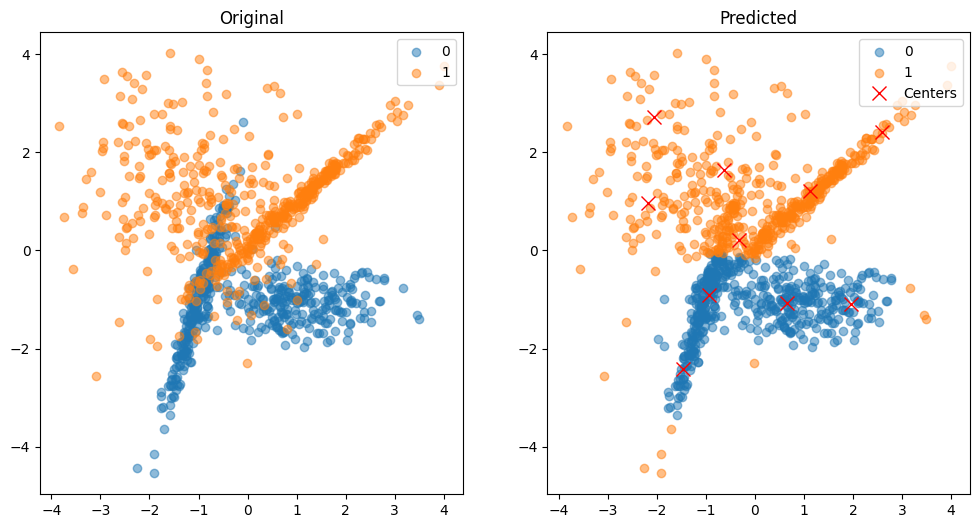

In [8]:
import numpy as np #type:ignore
import matplotlib.pyplot as plt  #type:ignore
from sklearn.cluster import KMeans #type:ignore
from sklearn.datasets import make_classification #type:ignore
from sklearn.model_selection import train_test_split #type:ignore
from sklearn.metrics import accuracy_score #type:ignore
from scipy.spatial.distance import cdist #type:ignore
from sklearn.linear_model import LogisticRegression #type:ignore

# Generate dataset
X, y = make_classification(n_samples=1000, n_features=2, n_classes=2, 
                           n_clusters_per_class=2, random_state=42, n_redundant=0) 

print("X and y\n") 
print(X[:5], y[:5], sep="\n\n") 

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)            

# Set up KMeans clustering
num_neurons = 10 
kmeans = KMeans(n_clusters=num_neurons, random_state=42, n_init=10) 
kmeans.fit(X_train) 
centers = kmeans.cluster_centers_ 
print("Centers:", centers) 

# Calculate standard deviation for the RBF layer
std_dev = np.mean(cdist(centers, centers, 'euclidean')) / np.sqrt(2 * num_neurons) 
print("Standard Deviation:", std_dev) 

# Define RBF activation function
def rbf_activation(X, centers, std_dev): 
    return np.exp(-cdist(X, centers, 'sqeuclidean') / (2 * std_dev**2)) 

# Apply RBF transformation
rbf_train = rbf_activation(X_train, centers, std_dev) 
rbf_test = rbf_activation(X_test, centers, std_dev) 

# Add bias term
rbf_train = np.hstack([rbf_train, np.ones((rbf_train.shape[0], 1))]) 
rbf_test = np.hstack([rbf_test, np.ones((rbf_test.shape[0], 1))]) 

# Train logistic regression on transformed data
clf = LogisticRegression() 
clf.fit(rbf_train, y_train) 
y_pred = clf.predict(rbf_test) 


# Visualization
# def plot_result(X, y, centers=None): 
#     plt.scatter(X[y == 0, 0], X[y == 0, 1], label="0", alpha=0.5) 
#     plt.scatter(X[y == 1, 0], X[y == 1, 1], label="1", alpha=0.5) 
#     if centers is not None: 
#         plt.plot(centers[:, 0], centers[:, 1], 'rx', label="Centers", markersize=10) 
#     plt.legend(loc="upper right") 

# Prepare data for prediction plot
rbf_x = rbf_activation(X, centers=centers, std_dev=std_dev) 
activated_x = np.hstack([rbf_x, np.ones((rbf_x.shape[0], 1))]) 

# Plot original and predicted results
plt.figure(figsize=(12, 6)) 
plt.subplot(121) 
plt.title("Original") 
plot_result(X, y) 
plt.subplot(122) 
plt.title("Predicted") 
plot_result(X, clf.predict(activated_x), centers=centers) 
plt.show()


X and y

[[-0.99910178 -0.66386   ]
 [ 1.24668618  1.15359685]
 [ 0.96277683  0.85939747]
 [-2.95744095  2.03364529]
 [ 1.14116527  1.05944863]]

[1 1 1 1 1]
Centers: [[-1.64964795  3.19338213]
 [-0.40405442  0.0555544 ]
 [ 0.90828448  0.97080243]
 [ 0.65991484 -1.07899139]
 [-1.44803171 -2.34928253]
 [-2.16572036  1.20531165]
 [ 2.01947065  2.05183819]
 [-0.9370478  -0.87883531]
 [-0.56916172  1.37935468]
 [ 1.93776342 -1.07282834]]
Standard Deviation: 0.5953478336548477


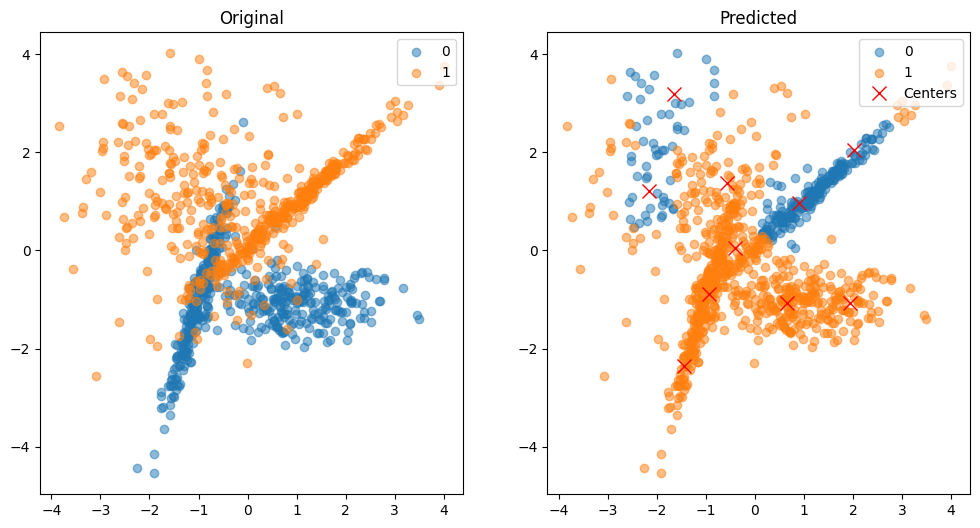

In [ ]:
import numpy as np #type:ignore
import matplotlib.pyplot as plt  #type:ignore
from sklearn.cluster import KMeans #type:ignore
from sklearn.datasets import make_classification #type:ignore
from sklearn.model_selection import train_test_split #type:ignore
from sklearn.metrics import accuracy_score #type:ignore
from scipy.spatial.distance import cdist #type:ignore
from sklearn.linear_model import LogisticRegression #type:ignore

# Generate dataset
X, y = make_classification(n_samples=1000, n_features=2, n_classes=2, 
                           n_clusters_per_class=2, random_state=42, n_redundant=0) 

print("X and y\n") 
print(X[:5], y[:5], sep="\n\n") 

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)            

# Set up KMeans clustering
num_neurons = 10 
kmeans = KMeans(n_clusters=num_neurons, random_state=42, n_init=10) 
kmeans.fit(X_train) 
centers = kmeans.cluster_centers_ 
print("Centers:", centers) 

# Calculate standard deviation for the RBF layer
std_dev = np.mean(cdist(centers, centers, 'euclidean')) / np.sqrt(2 * num_neurons) 
print("Standard Deviation:", std_dev) 

# Define RBF activation function
def rbf_activation(X, centers, std_dev): 
    return np.exp(-cdist(X, centers, 'sqeuclidean') / (2 * std_dev**2)) 

# Apply RBF transformation
rbf_train = rbf_activation(X_train, centers, std_dev) 
rbf_test = rbf_activation(X_test, centers, std_dev) 

# Add bias term
rbf_train = np.hstack([rbf_train, np.ones((rbf_train.shape[0], 1))]) 
rbf_test = np.hstack([rbf_test, np.ones((rbf_test.shape[0], 1))]) 

# # Train logistic regression on transformed data
clf = LogisticRegression() 
clf.fit(rbf_train, y_train) 
y_pred = clf.predict(rbf_test) 


# Visualization
def plot_result(X, y, centers=None): 
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="0", alpha=0.5) 
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="1", alpha=0.5) 
    if centers is not None: 
        plt.plot(centers[:, 0], centers[:, 1], 'rx', label="Centers", markersize=10) 
    plt.legend(loc="upper right") 

# Prepare data for prediction plot
rbf_x = rbf_activation(X, centers=centers, std_dev=std_dev) 
activated_x = np.hstack([rbf_x, np.ones((rbf_x.shape[0], 1))]) 

# Plot original and predicted results
plt.figure(figsize=(12, 6)) 
plt.subplot(121) 
plt.title("Original") 
plot_result(X, y) 
plt.subplot(122) 
plt.title("Predicted") 
plot_result(X, clf.predict(activated_x), centers=centers) 
plt.show()
